**- [ ] Самостоятельно скачать данные (из открытых источников по интересующей тематике, на сайте [kaggle](https://www.kaggle.com), [UCI](https://archive.ics.uci.edu/ml/datasets.php) репозитория, [Google Dataset Search](https://datasetsearch.research.google.com/) и др.). Для полного балла нужно выбрать данные, в которых есть пропущенные значения.**

**- [ ] Считать данные и вывести их основные характеристики, описание признаков.**

Датасет:
https://www.kaggle.com/datasets/taeefnajib/used-car-price-prediction-dataset/data

In [161]:
# Загрузка библиотек
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [162]:
df = pd.read_csv('used_cars.csv') # Чтение датасета
df.head(10) # Вывод первых десяти строк датасета

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
5,Acura,ILX 2.4L,2016,"136,397 mi.",Gasoline,2.4 Liter,F,Silver,Ebony.,None reported,NaN,"$14,798"
6,Audi,S3 2.0T Premium Plus,2017,"84,000 mi.",Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Black,None reported,Yes,"$31,000"
7,BMW,740 iL,2001,"242,000 mi.",Gasoline,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,A/T,Green,Green,None reported,Yes,"$7,300"
8,Lexus,RC 350 F Sport,2021,"23,436 mi.",Gasoline,311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,Black,Black,None reported,Yes,"$41,927"
9,Tesla,Model X Long Range Plus,2020,"34,000 mi.",NaN,534.0HP Electric Motor Electric Fuel System,A/T,Black,Black,None reported,Yes,"$69,950"


In [163]:
df.shape # Количество строк и столбцов в датасете

(4009, 12)

In [164]:
df.isnull().sum() # Количество пропущенных значений по столбцам

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [165]:
df.describe() # статистики по количественным признакам

,model_year
count,4009.000000
mean,2015.515590
std,6.104816
min,1974.000000
25%,2012.000000
50%,2017.000000
75%,2020.000000
max,2024.000000


In [166]:
df.info() # смотрим тип признаков и какие из стобцов содержат пропущенные значения

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


**- [ ] Сформулировать задачу предсказания, какой признак интересно было бы предсказывать по остальным.**

Предсказание аварийности автомобиля (accident)

In [167]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [168]:
df['accident'].value_counts() # Категориальный признак

accident
None reported                             2910
At least 1 accident or damage reported     986
Name: count, dtype: int64

In [169]:
df['accident'].isnull().sum() # Кол-во пропущенных значений в accident

113

**- [ ] * (+2 балла) Произвести чистку данных (Data Cleaning). Например, заполнить пропущенные значения чем то осмысленным для поставленной задачи.**

**- [ ] * (+2 балла) Выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные если это нужно), убрать ненужные признаки, создать новые (Feature Engineering).**

Уберём столбцы engine, fuel_type, transmission, int_col, ext_col, model и преобразуем price, accident, clean_title.

In [170]:
df = df.drop(columns=['engine', 'fuel_type', 'transmission','int_col','ext_col','model'], axis=1)
df.head()

,brand,model_year,milage,accident,clean_title,price
0,Ford,2013,"51,000 mi.",At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,2021,"34,742 mi.",At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,2022,"22,372 mi.",None reported,NaN,"$54,598"
3,INFINITI,2015,"88,900 mi.",None reported,Yes,"$15,500"
4,Audi,2021,"9,835 mi.",None reported,NaN,"$34,999"


In [171]:
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(int)
df['milage'] = df['milage'].str.replace(' mi.','').str.replace(',', '').astype(int)

In [172]:
df.head()

,brand,model_year,milage,accident,clean_title,price
0,Ford,2013,51000,At least 1 accident or damage reported,Yes,10300
1,Hyundai,2021,34742,At least 1 accident or damage reported,Yes,38005
2,Lexus,2022,22372,None reported,NaN,54598
3,INFINITI,2015,88900,None reported,Yes,15500
4,Audi,2021,9835,None reported,NaN,34999


In [173]:
df.isnull().sum() # Пропущенные значения по столбцам

brand            0
model_year       0
milage           0
accident       113
clean_title    596
price            0
dtype: int64

In [174]:
df['clean_title'].unique() # Значения в столбце clean_title. Пропущенные значения можно заменить на 'No'

array(['Yes', nan], dtype=object)

In [175]:
df['clean_title'] = df['clean_title'].fillna('No') # Заполнение пустых значений
df.head()

In [177]:
# Преобразование столбца accident. Удалим строки с пропущенными значениями accident
df = df[(df['accident'] == 'None reported') | (df['accident'] == 'At least 1 accident or damage reported')] # Удаление пропущенных значений accident
df['accident'] = df['accident'].replace(['None reported', 'At least 1 accident or damage reported'],['No','Yes']) # Замена значений
df.head()

**- [ ] Провести анализ признаков, используя визуализацию (hist(), boxplot(), countplot(), barplot() и тд), сделать выводы, которые могут быть полезны при дальнейшем решении задачи предсказания.**

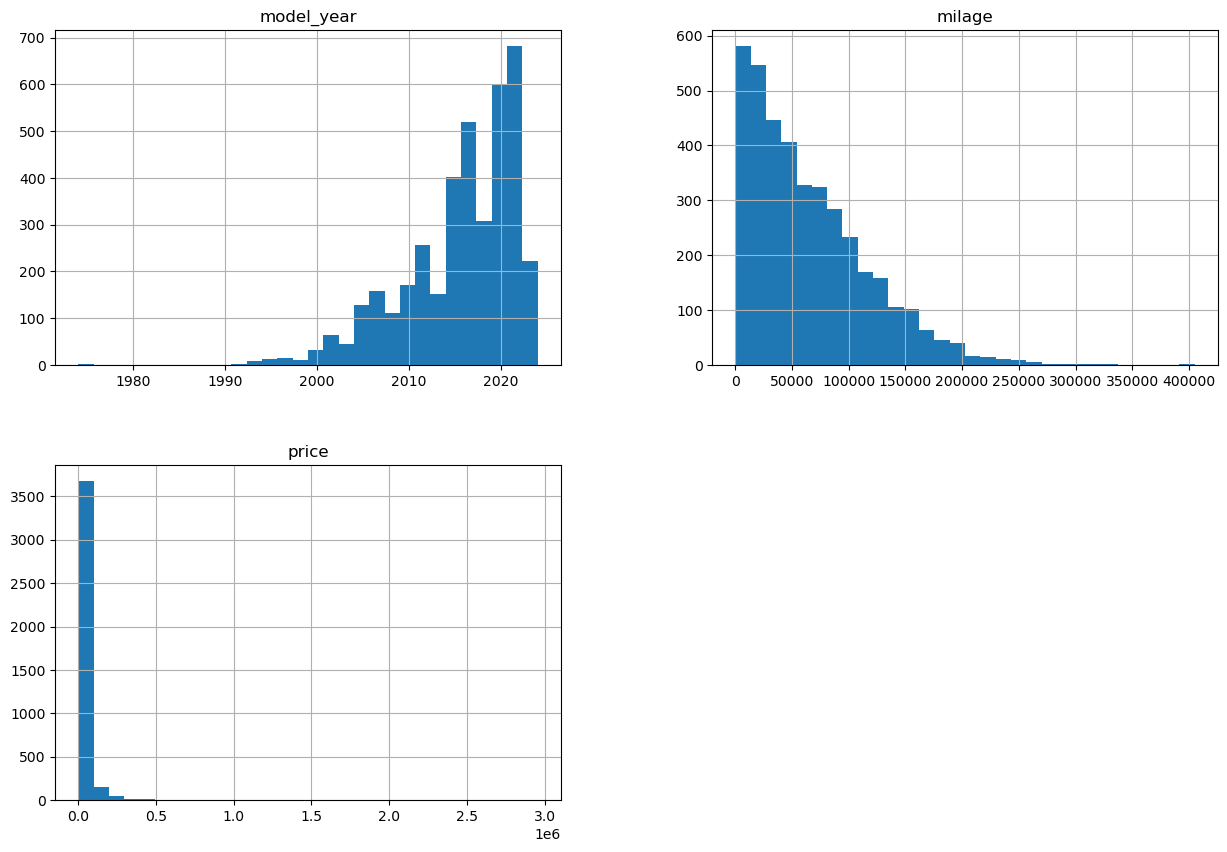

In [180]:
df.hist(bins=30, figsize=(15, 10)); # Визуализация числовых признаков

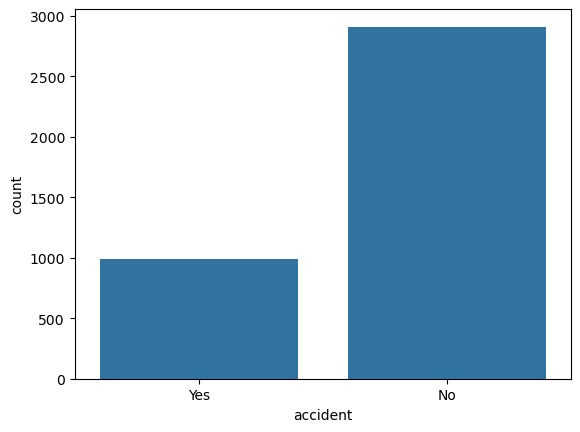

In [181]:
sns.countplot(x='accident', data=df); # Визуализация accident по категориям

In [184]:
df['milage'].mean() # Среднее значение milage

65159.28131416838

In [412]:
df.columns

Index(['brand', 'model_year', 'milage', 'accident', 'clean_title', 'price'], dtype='object')

<AxesSubplot: >

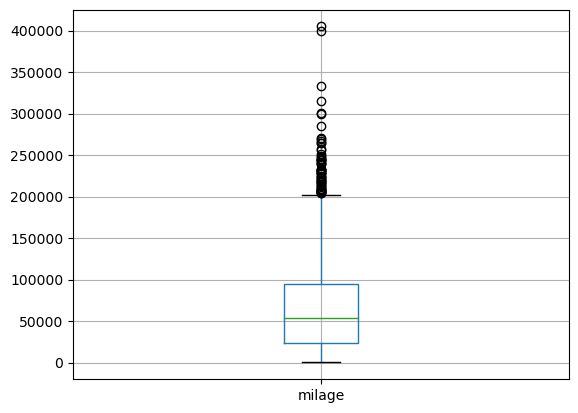

In [185]:
df.boxplot(column='milage') # Визуализация распределения milage

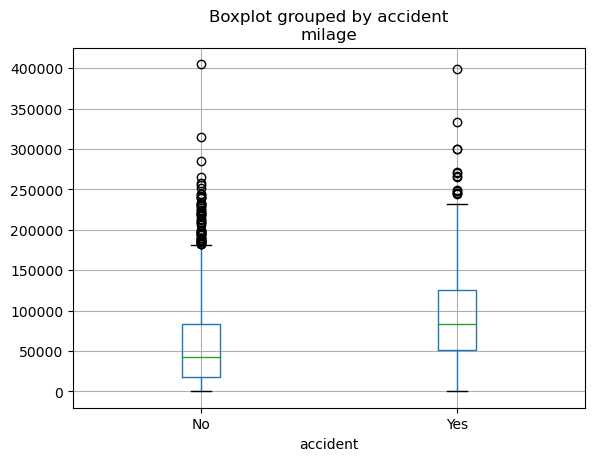

In [187]:
df.boxplot(column="milage", by="accident") # Визуализация распределения milage по accident
plt.show()

<AxesSubplot: xlabel='accident', ylabel='milage'>

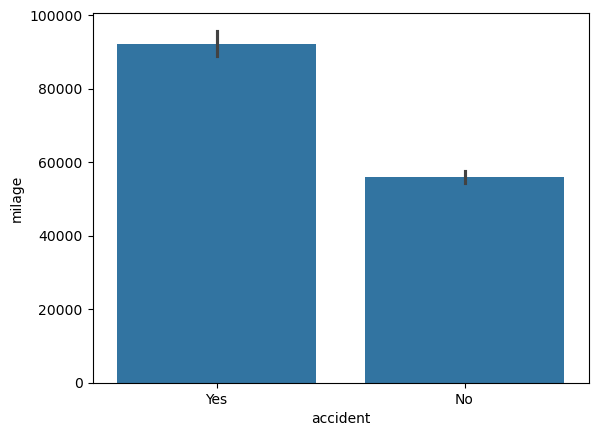

In [189]:
sns.barplot(df, x='accident', y='milage') # barplot milage по accident

**- [ ] * (+1 балл) Оценить зависимость между признаками (визуализация или построение матрицы корреляции).**

In [190]:
df.columns

Index(['brand', 'model_year', 'milage', 'accident', 'clean_title', 'price'], dtype='object')

In [193]:
# Преобразование категориальных признаков в количественные
df['clean_title'] = df['clean_title'].replace(['Yes', 'No'],[1,0]) # Замена значений
df['clean_title'] = pd.to_numeric(df['clean_title']) # Значения в числа

df['accident'] = df['accident'].replace(['']).replace(['Yes', 'No'],[1,0])
df['accident'] = pd.to_numeric(df['accident'])

In [194]:
df2 = df[['accident','clean_title','model_year','milage','price']] # Создание нового датасета как источник для матрицы корреляции

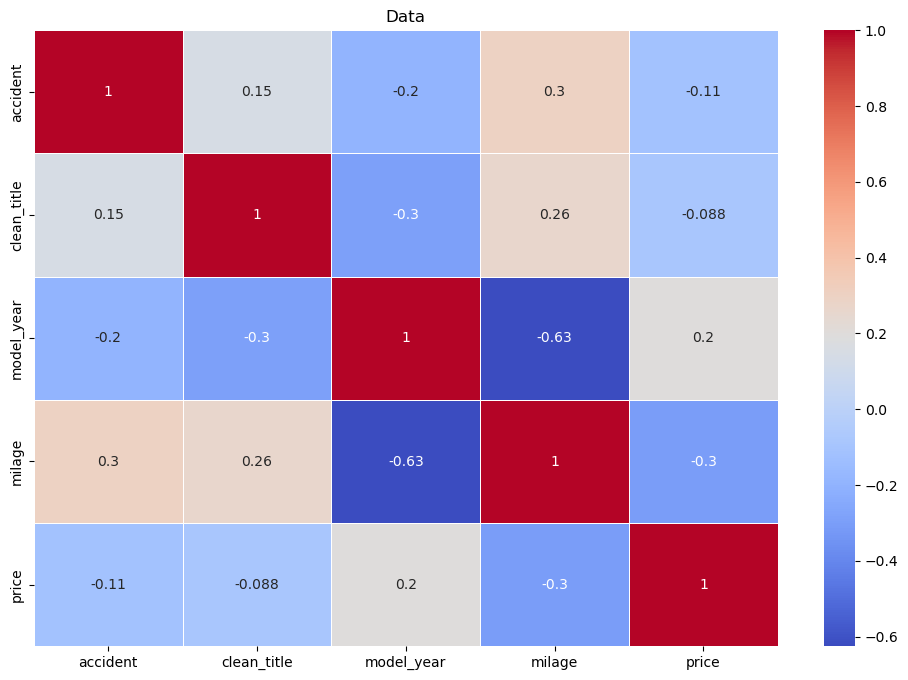

In [195]:
corr_matrix = df2.corr() # Матрица корреляции

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm', linewidths=0.5)
plt.title('Data')
plt.show()

**Вывод: по результатам проведённого разведочного анализа, аварийность сильнее всего зависит от пробега автомобиля**